In [81]:
import pandas as pd
from matplotlib import pyplot as plt

In [82]:
df = pd.read_csv("results/results_P10_ep10_N500_B40_min10_max20_g5_L1000.csv")

In [83]:
df.keys()

Index(['P', 'epsilon', 'N', 'budget', 'min_prize', 'max_prize', 'gp_0', 'p_1',
       'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9', 'k_1_winners',
       'k_1_util', 'k_1_egal', 'k_1_nash', 'k_1_comp', 'k_1_EL', 'k_2_winners',
       'k_2_util', 'k_2_egal', 'k_2_nash', 'k_2_comp', 'k_2_EL', 'k_3_winners',
       'k_3_util', 'k_3_egal', 'k_3_nash', 'k_3_comp', 'k_3_EL', 'k_4_winners',
       'k_4_util', 'k_4_egal', 'k_4_nash', 'k_4_comp', 'k_4_EL', 'k_5_winners',
       'k_5_util', 'k_5_egal', 'k_5_nash', 'k_5_comp', 'k_5_EL', 'k_6_winners',
       'k_6_util', 'k_6_egal', 'k_6_nash', 'k_6_comp', 'k_6_EL', 'k_7_winners',
       'k_7_util', 'k_7_egal', 'k_7_nash', 'k_7_comp', 'k_7_EL', 'k_8_winners',
       'k_8_util', 'k_8_egal', 'k_8_nash', 'k_8_comp', 'k_8_EL', 'k_9_winners',
       'k_9_util', 'k_9_egal', 'k_9_nash', 'k_9_comp', 'k_9_EL'],
      dtype='object')

In [84]:
df["k_1_EL"]

10  10    0.587617
    10    0.575128
    10    0.541050
    10    0.269887
    10    0.558877
            ...   
    10    0.579730
    10    0.120862
    10    0.296594
    10    0.567503
    10    0.226215
Name: k_1_EL, Length: 1000, dtype: float64

In [85]:
def plot(df, metric):

    x = range(1, 10)
    means = []
    div = []

    for i in x:
        means.append(df[f"k_{i}_{metric}"].mean())
        div.append(df[f"k_{i}_{metric}"].std())

    plt.bar(x, means, yerr=div)

    plt.title(metric, fontsize=20)
    plt.xticks(range(1,10))

    plt.xlabel("k-value", fontsize=15)
    plt.ylabel("score", fontsize=15)
    plt.show()

## Plot all

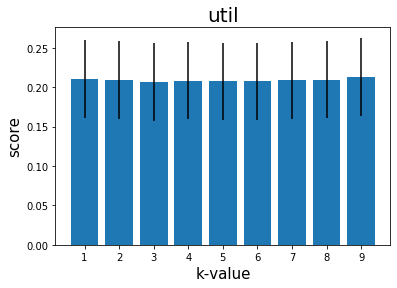

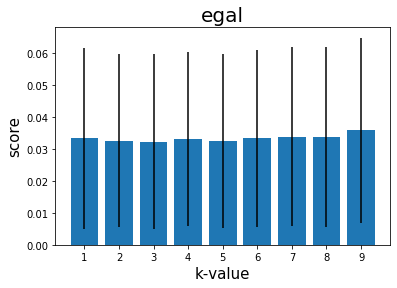

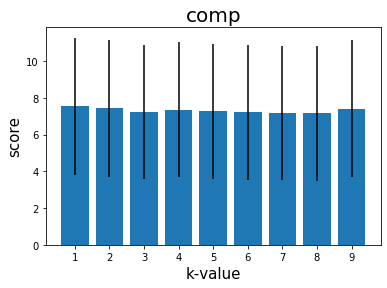

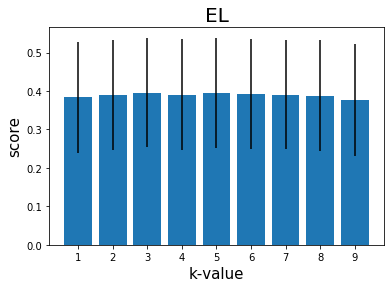

In [86]:
plot(df, "util")
plot(df, "egal")
plot(df, "comp")
plot(df, "EL")

## Plot based on P standard Deviation

In [87]:
df["Pstd"] = df[['p_1', 'p_2', 'p_3', 'p_4','p_5', 'p_6', 'p_7', 'p_8', 'p_9']].std(axis=1)

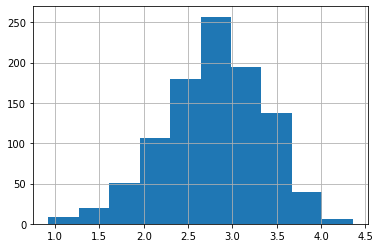

In [88]:
df["Pstd"].hist()

### High

In [89]:
high = df[df["Pstd"] > 3.2]

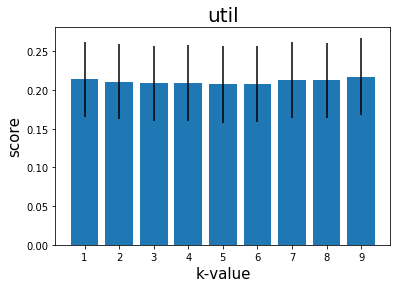

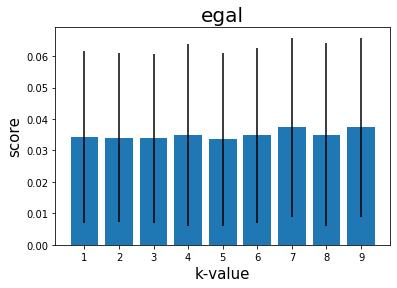

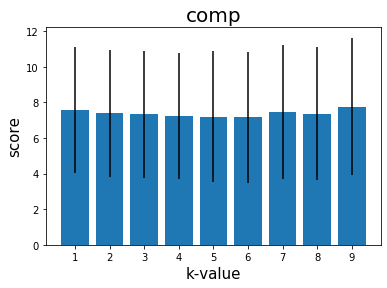

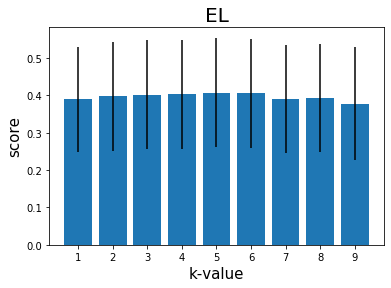

In [90]:
plot(high, "util")
plot(high, "egal")
plot(high, "comp")
plot(high, "EL")

### Middle

In [91]:
mid = df[(df["Pstd"] > 2.5) & (df["Pstd"] < 3.2)]

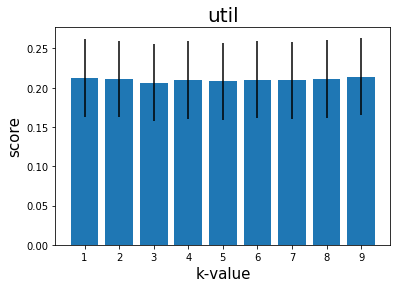

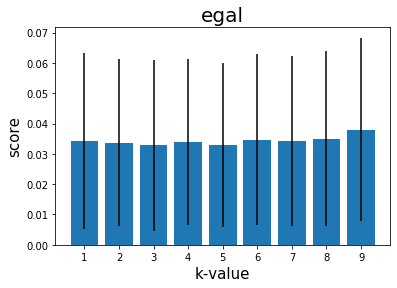

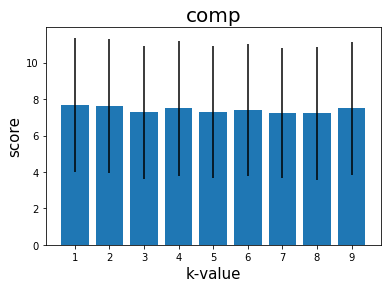

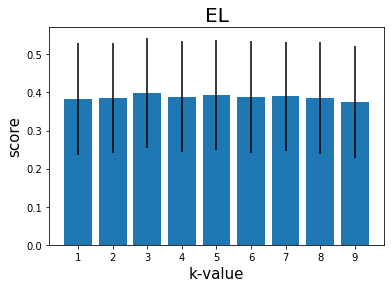

In [92]:
plot(mid, "util")
plot(mid, "egal")
plot(mid, "comp")
plot(mid, "EL")

### Low

In [93]:
low = df[df["Pstd"] < 2.5]

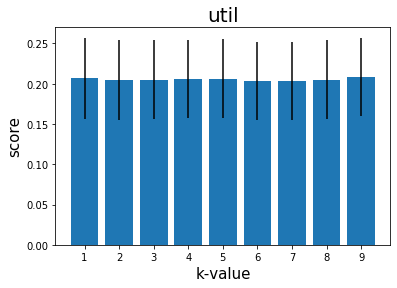

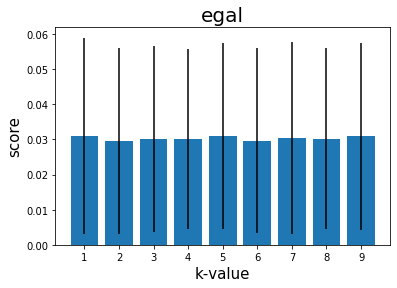

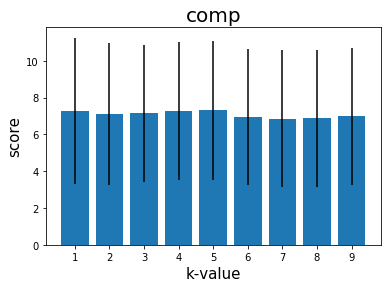

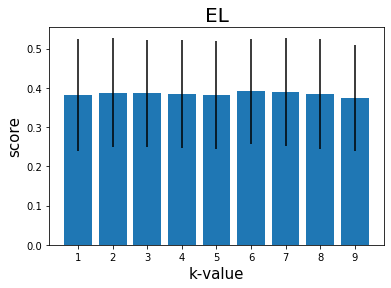

In [94]:
plot(low, "util")
plot(low, "egal")
plot(low, "comp")
plot(low, "EL")

In [95]:
import numpy as np

In [96]:
def pie(num_1, num_2, t, show=True):

    res = []
    res.append(len(df[df[f"k_{num_1}_{t}"] > df[f"k_{num_2}_{t}"]]))
    res.append(len(df[df[f"k_{num_1}_{t}"] == df[f"k_{num_2}_{t}"]]))
    res.append(len(df[df[f"k_{num_1}_{t}"] < df[f"k_{num_2}_{t}"]]))
    
    if show:
        plt.pie(res, labels=["g", "e", "s"])
        plt.title(f"k={num_1} vs k={num_2}", fontsize=20)
        plt.show()
    
    return res

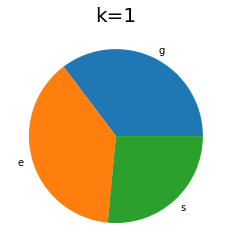

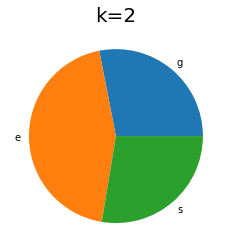

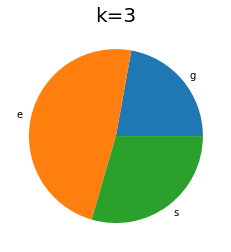

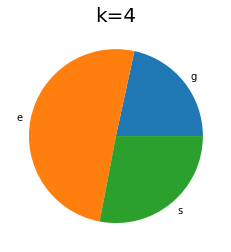

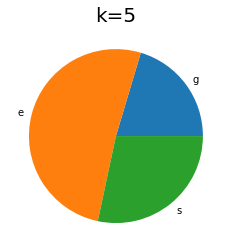

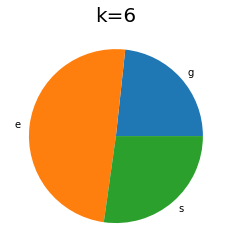

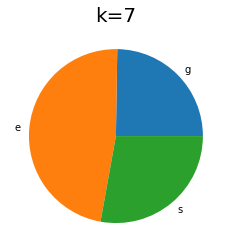

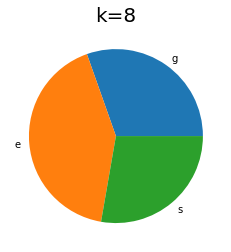

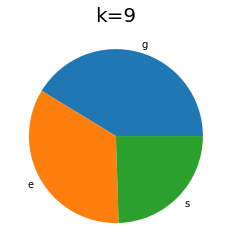

In [98]:
for i in range(1, 10):
    res = np.array([0, 0, 0])
    for j in range(1, 10):
        if i == j:
            continue
            
        res += np.array(pie(i, j, "util", show=False))
        
        
    plt.pie(res, labels=["g", "e", "s"])
    plt.title(f"k={i}", fontsize=20)
    plt.show()